<a href="https://colab.research.google.com/github/ShashwatVv/naiveDL/blob/main/CNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.signal import convolve2d
from imageio import imread

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

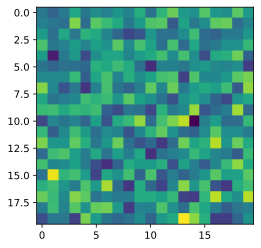

In [2]:
## performing convolution

imgN = 20 ## dimension n--> for  an image[let's consider nXn for now]
image = np.random.randn(imgN, imgN)
plt.imshow(image)


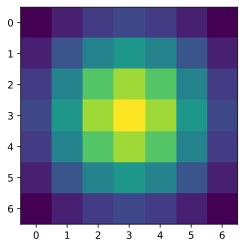

In [8]:
## creating a gaussian kernel
##First let's create Y and X 
len_kernel = 7
Y,  X  = np.meshgrid(np.linspace(-3, 3, len_kernel), np.linspace(-3, 3, len_kernel))
##A gaussian kernel now
kernel = np.exp(-(X**2+Y**2)/len_kernel)
plt.imshow(kernel)

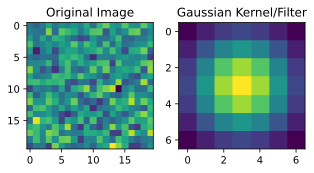

In [11]:
##Plotting these side by side
fig, axes = plt.subplots(1, 2, figsize=(5,7))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[1].imshow(kernel)
axes[1].set_title("Gaussian Kernel/Filter")
plt.show()


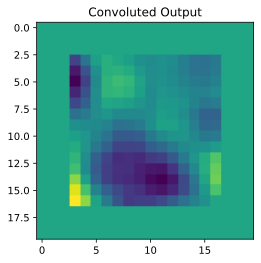

In [16]:
##Let's create output with all zeros
output_img = np.zeros((imgN, imgN))
h = len_kernel//2

for rowi in range(h, imgN-h):
  for coli in range(h, imgN-h):
    ## piece by piece
    image_piece = image[rowi-h:rowi+h+1,:] ## selected rows
    ##but still this piece has lots of extra columns
    image_piece = image_piece[:,coli-h:coli+h+1] ##selected columns

    ##perform convolution, i.e, dot product with inverted kernel
    dot_p = np.sum(image_piece*kernel[::-1, ::-1])
    output_img[rowi,coli] = dot_p

plt.imshow(output_img)
plt.title("Convoluted Output")
plt.show()